# TP2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Data Gen

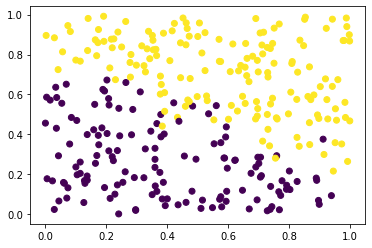

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def datagen(n):
    X = np.random.rand(2,n)
    y = np.where(-.5* X[0] + .75 > X[1], -1, 1)
    d = abs((.5 * X[0] + X[1] -.75)) / (math.sqrt(.5 * .5 + 1 * 1))
    r = np.exp(-(d*d)/(2*0.05*0.05))
    z = np.random.binomial(n=1, p=r/2)
    y[z==1] = -y[z==1]
    y = np.where(y==-1, 0, 1)
    return X, y

X, y = datagen(300)
plt.scatter(X[0], X[1], c=y)
plt.show()

In [8]:
X_plus = np.vstack((X, np.ones((1,300))))
print(X_plus.shape)
print(X_plus)

(3, 300)
[[4.30036473e-02 2.01899518e-01 1.38533052e-01 8.70486239e-01
  2.64103376e-01 3.78560196e-01 6.92458263e-01 1.57808382e-02
  9.21382305e-01 6.55116674e-01 8.32631600e-01 7.97163091e-02
  9.38199929e-01 4.43573294e-01 1.04257090e-01 7.49953789e-01
  5.92877371e-01 7.76265575e-01 9.41450167e-01 1.88659916e-01
  6.90258852e-01 1.58625872e-01 4.21124318e-01 5.75641603e-01
  8.50397603e-01 7.97210496e-01 6.94446618e-01 7.40773107e-02
  4.67168975e-01 3.99877250e-01 5.64441169e-02 4.71844884e-01
  9.82603998e-01 2.24657242e-01 2.32456681e-02 7.38939413e-01
  1.72275913e-01 9.98945983e-02 8.67088437e-01 7.35358606e-01
  1.64318573e-01 3.27752938e-01 3.45947854e-01 4.97981059e-01
  7.58396473e-01 8.00252841e-01 7.04294302e-01 9.55008441e-01
  2.37979060e-01 3.61490698e-02 7.05278511e-01 8.92636290e-01
  4.33369595e-01 9.23349250e-01 1.14338877e-01 2.91789849e-01
  3.59628380e-01 7.30137238e-01 3.23201090e-01 3.59521290e-01
  8.02262668e-01 6.14905952e-01 3.80185320e-01 3.77400621e-01

# 2. Batch Gradient Descent

(48475, 3)
[[  0.           0.           0.        ]
 [  0.40358849   0.7794128    0.22      ]
 [  0.1947625    0.90164199  -0.69989718]
 ...
 [ 15.27447638  25.35383783 -19.78889858]
 [ 15.27447638  25.35383783 -19.78889858]
 [ 15.27447638  25.35383783 -19.78889858]]


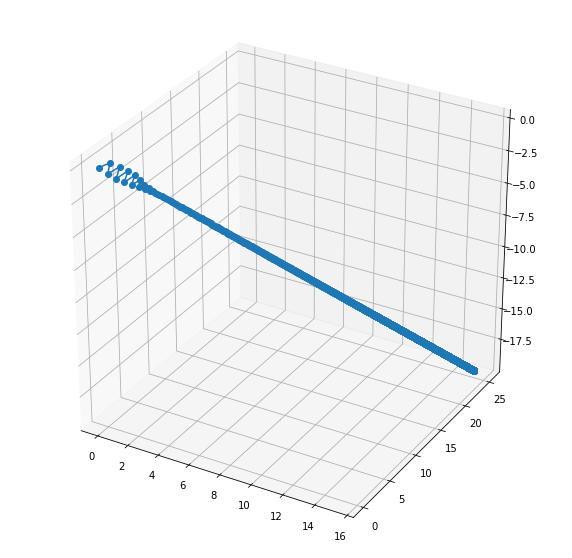

In [9]:
theta = np.array([0, 0, 0])
thetas = np.array([theta])
learning_rate = 0.02

while True:
    pred = sigmoid(X_plus.T@theta)
    err = pred - y
    g = X_plus@err
    theta = theta - learning_rate*g
    thetas = np.vstack((thetas, theta))
    if np.array_equal(thetas[len(thetas) - 2], theta):
        break
    
print(thetas.shape)
print(thetas)

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.gca(projection='3d')
ax1.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')

(10069, 3)
[[  0.           0.           0.        ]
 [  2.01794243   3.89706401   1.1       ]
 [ -3.09896901   0.50802821 -11.79469625]
 ...
 [ 15.27447638  25.35383783 -19.78889858]
 [ 15.27447638  25.35383783 -19.78889858]
 [ 15.27447638  25.35383783 -19.78889858]]


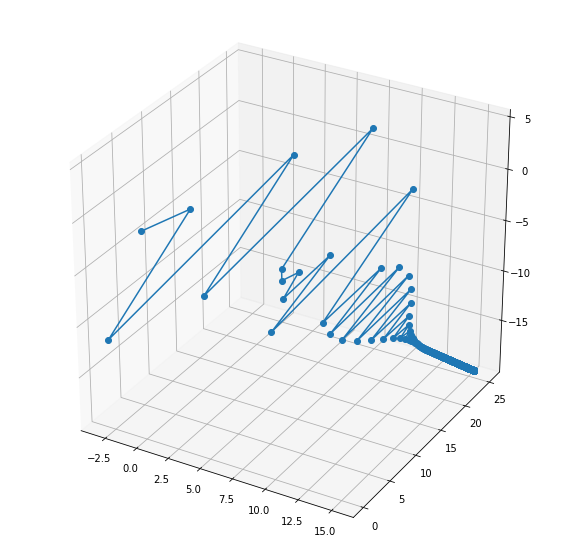

In [10]:
theta = np.array([0, 0, 0])
thetas = np.array([theta])
learning_rate = 0.1

while True:
    pred = sigmoid(X_plus.T@theta)
    err = pred - y
    g = X_plus@err
    theta = theta - learning_rate*g
    thetas = np.vstack((thetas, theta))
    if np.array_equal(thetas[len(thetas) - 2], theta):
        break
    
print(thetas.shape)
print(thetas)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')

# 3. Newton Method

(3595, 3)
[[  1.          -1.           0.        ]
 [  1.01126708  -0.93530201  -0.03652776]
 [  1.02254826  -0.87148302  -0.07264235]
 ...
 [ 15.27447638  25.35383783 -19.78889858]
 [ 15.27447638  25.35383783 -19.78889858]
 [ 15.27447638  25.35383783 -19.78889858]]


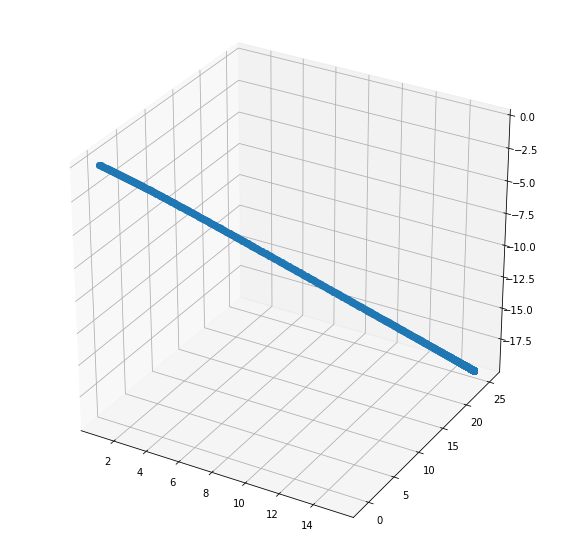

In [11]:
theta = np.array([1, -1, 0])
thetas = np.array([theta])
learning_rate = 0.01

while True:
    pred = sigmoid(X_plus.T@theta)
    err = pred - y
    s = np.multiply(pred, (1-pred))
    S = np.diag(s.flatten())

    H = X_plus@S@X_plus.T
    g = X_plus@err
    theta = theta - learning_rate*np.linalg.inv(H)@g
    thetas = np.vstack( (thetas, theta))
    if np.array_equal(thetas[len(thetas) - 2], theta):
        break
    
print(thetas.shape)
print(thetas)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')

(369, 3)
[[  1.          -1.           0.        ]
 [  1.11267084  -0.35302007  -0.36527764]
 [  1.22870837   0.21594652  -0.6948607 ]
 ...
 [ 15.27447638  25.35383783 -19.78889858]
 [ 15.27447638  25.35383783 -19.78889858]
 [ 15.27447638  25.35383783 -19.78889858]]


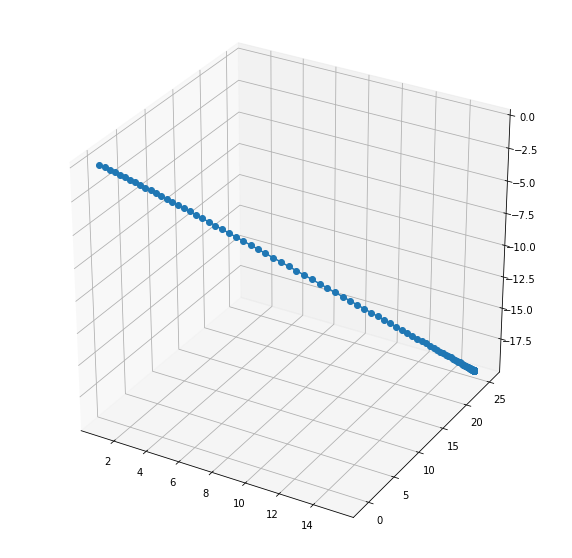

In [12]:
theta = np.array([1, -1, 0])
thetas = np.array([theta])
learning_rate = 0.1

while True:
    pred = sigmoid(X_plus.T@theta)
    err = pred - y
    s = np.multiply(pred, (1-pred))
    S = np.diag(s.flatten())

    H = X_plus@S@X_plus.T
    g = X_plus@err
    theta = theta - learning_rate*np.linalg.inv(H)@g
    thetas = np.vstack( (thetas, theta))
    if np.array_equal(thetas[len(thetas) - 2], theta):
        break
    
print(thetas.shape)
print(thetas)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')

# 4. SGD

In [13]:
theta = np.array([1, -1, 0])
thetas = np.array([theta])
learning_rate = 1.5

while True:
    sigma = np.random.permutation(300)
    X_plus = np.vstack((X_plus[0][sigma], X_plus[1][sigma], X_plus[2][sigma]))
    y = y[sigma]
    for i in range(300):
        pred = sigmoid(X_plus[:,i].T@theta)
        err = pred - y[i]
        g = X_plus[:,i]*err
        theta = theta - learning_rate*g
    thetas = np.vstack((thetas, theta))
    if np.array_equal(thetas[len(thetas) - 2], theta):
        break

print(thetas.shape)
print(thetas)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')

KeyboardInterrupt: 

(5001, 3)
[[ 19.30763238  31.43520627 -22.7176819 ]
 [ 19.16993093  32.18961525 -21.8136999 ]
 [ 18.81188193  30.35186292 -24.42378073]
 [ 17.36714311  30.03947261 -25.96113587]
 [ 18.61121915  30.70539293 -24.25041281]
 [ 18.88648726  31.47691595 -22.91409545]
 [ 18.79889049  30.47136116 -24.03732886]
 [ 19.38449416  30.89806546 -23.16732847]
 [ 18.18166614  30.61630873 -24.04321212]
 [ 18.44359039  31.09727868 -23.32872145]
 [ 18.36786638  30.9379567  -23.56747702]
 [ 17.17014431  30.1852527  -25.32439972]
 [ 18.33432476  30.77324713 -23.653161  ]
 [ 18.60657968  30.93510813 -23.10482466]
 [ 18.69882877  30.63729527 -23.25687312]
 [ 19.75044747  30.8164204  -22.20978318]
 [ 18.35398546  30.12236524 -24.08969335]
 [ 19.16448418  30.60475523 -22.84468287]
 [ 17.87668524  31.18542205 -23.44037625]
 [ 18.09932882  29.42113696 -25.54454252]]


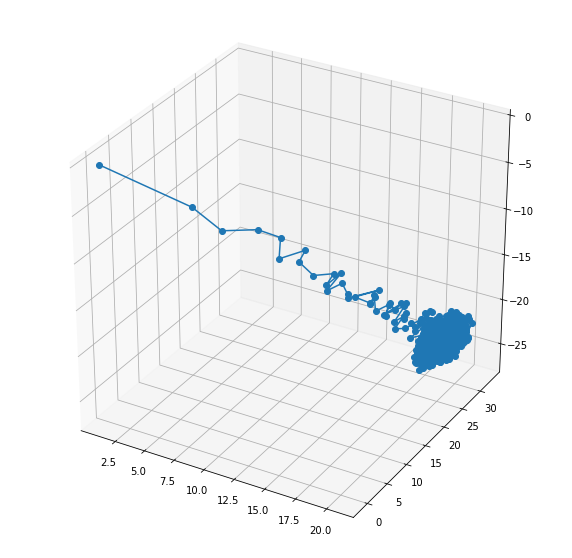

In [15]:
theta = np.array([1, -1, 0])
thetas = np.array([theta])
learning_rate = 1.5

for k in range(5000):
#while True:
    sigma = np.random.permutation(300)
    X_plus = np.vstack((X_plus[0][sigma], X_plus[1][sigma], X_plus[2][sigma]))
    y = y[sigma]
    for i in range(300):
        pred = sigmoid(X_plus[:,i].T@theta)
        err = pred - y[i]
        g = X_plus[:,i]*err
        theta = theta - learning_rate*g

    if np.array_equal(thetas[-1], theta):
        thetas = np.vstack( (thetas, theta))
        break
    thetas = np.vstack( (thetas, theta))

print(thetas.shape)
print(thetas[-20:])

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')

(10001, 3)
[[ 14.52394244  24.22165489 -18.86179778]
 [ 14.52396164  24.22170337 -18.86196143]
 [ 14.52408151  24.22184958 -18.86192517]
 [ 14.52413354  24.22193674 -18.86201495]
 [ 14.52422823  24.22205945 -18.86202719]
 [ 14.52428632  24.22214873 -18.86210998]
 [ 14.52428517  24.22217423 -18.86231931]
 [ 14.52437143  24.22228556 -18.86235123]
 [ 14.52432789  24.22227178 -18.86264264]
 [ 14.52439724  24.22237504 -18.86269855]
 [ 14.52438424  24.22239757 -18.86291936]
 [ 14.52443921  24.22247608 -18.8630171 ]
 [ 14.5245062   24.2225672  -18.86308995]
 [ 14.52455201  24.22264522 -18.86319689]
 [ 14.52462152  24.22274065 -18.86326278]
 [ 14.52468581  24.22283858 -18.86332874]
 [ 14.5247137   24.22289598 -18.86347408]
 [ 14.52480287  24.22301036 -18.8634988 ]
 [ 14.52487424  24.22311533 -18.86355115]
 [ 14.52491627  24.22319729 -18.86365467]]
[0.0025986649821928285, 0.0025986644624738297, 0.0025986639427551085, 0.002598663423036664, 0.0025986629033184967, 0.002598662383600607, 0.002598661

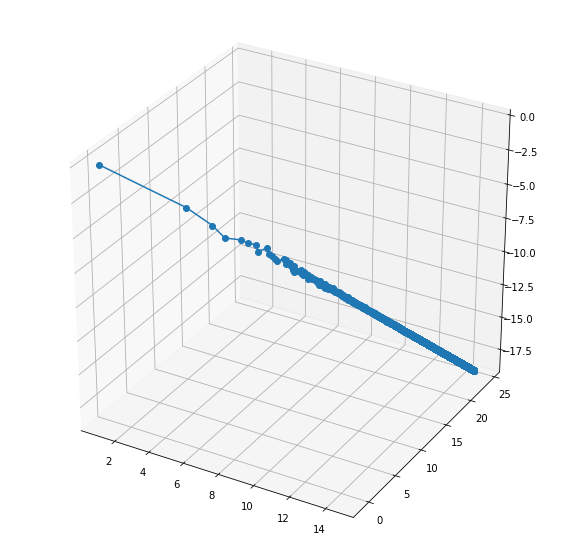

In [16]:
theta = np.array([1, -1, 0])
thetas = np.array([theta])
learning_rate = 1
learning_rates = [learning_rate]

k = 0
for k in range(10000):
#while True:
    sigma = np.random.permutation(300)
    X_plus = np.vstack((X_plus[0][sigma], X_plus[1][sigma], X_plus[2][sigma]))
    y = y[sigma]
    for i in range(300):
        pred = sigmoid(X_plus[:,i].T@theta)
        err = pred - y[i]
        g = X_plus[:,i]*err
        theta = theta - learning_rate*g
            
        learning_rate = 20 / (k*300 + i + 100)**.6
        learning_rates += [learning_rate]
        #print(learning_rate, theta)
    
    #print("=======================================================")
    k += 1
    if np.array_equal(thetas[-1], theta):
        thetas = np.vstack( (thetas, theta))
        break
    thetas = np.vstack( (thetas, theta))

print(thetas.shape)
print(thetas[-20:])
print(learning_rates[-20:])

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')

# 5. Comparaison

# 6. Proba

On a 

$$p(Y=1|x) = \frac {2}{3}$$
$$sigm(w.T*x + b) = \frac {2}{3}$$
On pose 
$$z = W^{T}*x + b$$
$$\frac {1}{1+exp^{-z}} = \frac {2}{3}$$
On a donc
$$3 = 2 + 2*exp^{-z}$$
$$1 = 2*exp^{-z}$$
$$ \frac {1}{2} =  exp^{-z}$$
$$ - \log {2} =  -z$$
$$ W^{T}*x + b - \log {2} =  0$$